author : 
> Nabiel Husein Shihab / nabielshihab@hotmail.com

# **Object Oriented Programming (OOP) & Dictionary untuk Kasus Diagram Wadati**
***


Script ini dibuat untuk membuat class wadati yang berguna untuk:
1. membentuk plot Ts-Tp terhadap Tp ataupun sebaliknya
2. menghitung regresi linier dari plot tersebut
3. menghitung origin time dari setiap event (gempa)
4. menghitung Vp/Vs
***

### Import modules

In [55]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Data arrival times setiap event

Dalam katalog data ini kita memiliki 5 event ID yang menandakan ada 5 event berbeda. Kelima event tersebut terekam pada beberapa stasiun. Di setiap pasangan event & stasiun, ditunjukkan waktu tiba gelombang P dan S.

In [56]:
arr_time = pd.read_csv("dataset\\arrival times.csv")
arr_time

,Event ID,Station,Year,Month,Day,Hour,Minutes,tp,ts
0,1,c0A22,2016,12,17,0,36,49.051,51.299
1,1,c0A74,2016,12,17,0,36,49.846,52.248
2,1,c0A24,2016,12,17,0,36,51.294,55.481
3,1,c0A21,2016,12,17,0,36,54.080,59.951
4,1,c0A73,2016,12,17,0,36,53.927,59.931
5,1,c0A23,2016,12,17,0,36,56.972,64.685
6,2,c0A21,2016,12,16,23,29,31.491,36.678
7,2,c0A22,2016,12,16,23,29,27.924,30.676
8,2,c0A23,2016,12,16,23,29,34.097,41.132
9,2,c0A24,2016,12,16,23,29,28.598,32.164


# 2. Membuat class Wadati
Terdapat beberapa method di dalamnya, antara lain:
1. fit --> regresi linier dari plot Ts-Tp vs Tp
2. details --> untuk print origin time dan Vp/Vs
3. plot --> untuk visualisasi Ts-Tp vs Tp plot

In [57]:
class Wadati:
    """Wadati diagram for an earthquake"""
    
    def __init__(self, name, arr_time):
        """initialize event attributes"""
        
        self.name = name
        self.tp = arr_time['tp'].values.reshape(-1, 1)
        self.ts = arr_time['ts'].values.reshape(-1, 1)
        self.ts_tp_diff = self.ts - self.tp 
    
    def fit(self):
        """retrieve origin time and Vp/Vs value"""
        # Vp/Vs value
        regressor_vpvs = LinearRegression()
        regressor_vpvs.fit(self.tp, self.ts_tp_diff)        
    
        self.parameter_vpvs = [regressor_vpvs.coef_[0][0], regressor_vpvs.intercept_[0]]
        self.vp_vs = self.parameter_vpvs[0] + 1
        
        # origin time (to) value
        regressor_to = LinearRegression()
        regressor_to.fit(self.ts_tp_diff, self.tp) 
        
        self.parameter_to = [regressor_to.coef_[0][0], regressor_to.intercept_[0]]
        self.to = self.parameter_to[1]
        
        return self
    
    def details(self):
        """ print origin time and Vp/Vs value"""
        print(f"{self.name} \n Origin time: {self.to} \n Vp/Vs: {self.vp_vs}")
              
    def plot(self):
        """ plot Wadati Diagram"""
        plt.suptitle(self.name.upper())
        
        # ts-tp as x_axes & tp as y-axes 
        ax1 = plt.subplot(121)
        
        # fitted line
        x1 = np.array([min(self.ts_tp_diff), max(self.ts_tp_diff)])
        y1 = (self.parameter_to[0] * x1 + self.parameter_to[1])
        
        # data points
        ax1.scatter(self.ts_tp_diff, self.tp)
        ax1.plot(x1, y1, c='r')
        
        ax1.set_xlabel('ts - tp')
        ax1.set_ylabel('tp')
       
        # tp as x-axes & ts-tp as y-axes 
        ax2 = plt.subplot(122)
        
        # fitted line
        x2 = np.array([min(self.tp), max(self.tp)])
        y2 = (self.parameter_vpvs[0] * x2 + self.parameter_vpvs[1])
        
        # data points
        ax2.scatter(self.tp, self.ts_tp_diff)
        ax2.plot(x2, y2, c='r')
        
        ax2.set_xlabel('tp')
        ax2.set_ylabel('ts - tp')

# 3. Menerapkan class Wadati tanpa Dictionary

## 3.1 penentuan event ID
Kali ini kita akan mencoba menggunakan Event Id = 1

In [58]:
# seleksi berdasarkan event ID
arr_time_1 = arr_time[arr_time["Event ID"] == 1]
arr_time_1.head()

,Event ID,Station,Year,Month,Day,Hour,Minutes,tp,ts
0,1,c0A22,2016,12,17,0,36,49.051,51.299
1,1,c0A74,2016,12,17,0,36,49.846,52.248
2,1,c0A24,2016,12,17,0,36,51.294,55.481
3,1,c0A21,2016,12,17,0,36,54.080,59.951
4,1,c0A73,2016,12,17,0,36,53.927,59.931


## 3.2 Membuat object dari class Wadati

event 1 
 Origin time: 46.06045562561145 
 Vp/Vs: 1.7202347144820789


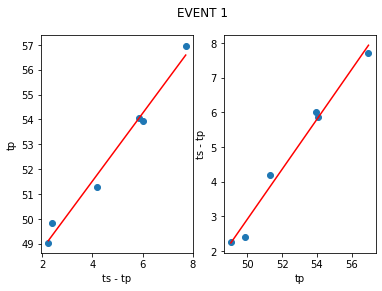

In [59]:
# membuat object dan menerapkan method fit
wadati1 = Wadati("event 1", arr_time_1).fit()

# melihat details dan plot dari object terkait
wadati1.details()
wadati1.plot()

# 4. Menggunakan Dictionary

Pada section ini kita dapat menggunakan dictionary untuk menyimpan data setiap event berdasarkan event ID tertentu dalam dataframe dan juga untuk menyimpan masing-masing object. Hal ini tentu akan membuat script kita menjadi jauh lebih singkat

In [63]:
# inisiasi dictionary untuk event ID yang sama
event_dict = {}

# inisiasi dictionary untuk object dari class Wadati setiap event ID
wadati_dict = {}

for i in range(1, max(arr_time['Event ID']) + 1):
    
    # seleksi event berdasarkan event ID dan menyimpannya ke dalam dictionary
    event_dict[f"event {i}"] = arr_time[arr_time["Event ID"] == i]
    
    # membuat object, menerapkan method fit, dan menyimpannya ke dalam dictionary
    wadati_dict[f"event {i}"] = Wadati(f"event {i}", event_dict[f"event {i}"]).fit()

# melihat dataframe dari event ID tertentu
event_dict["event 1"]

,Event ID,Station,Year,Month,Day,Hour,Minutes,tp,ts
0,1,c0A22,2016,12,17,0,36,49.051,51.299
1,1,c0A74,2016,12,17,0,36,49.846,52.248
2,1,c0A24,2016,12,17,0,36,51.294,55.481
3,1,c0A21,2016,12,17,0,36,54.080,59.951
4,1,c0A73,2016,12,17,0,36,53.927,59.931
5,1,c0A23,2016,12,17,0,36,56.972,64.685


event 1 
 Origin time: 46.06045562561145 
 Vp/Vs: 1.7202347144820789


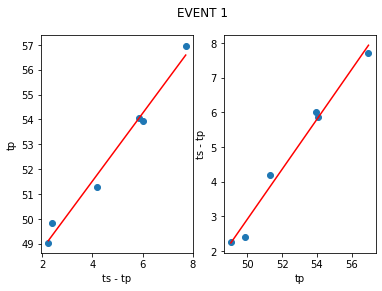

In [64]:
# melihat details dan plot dari object terkait 
wadati_dict["event 1"].details()
wadati_dict["event 1"].plot()